In [1]:
%load_ext autoreload
%autoreload 2

Imports

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

from get_data import get_data

# Load data

In [3]:
# load data from the neighbourhood of Greenfield, only residential properties
greenfield_df = get_data("q7d6-ambg", params = {"neighbourhood":"GREENFIELD", "mill_class_1": "RESIDENTIAL"})

In [4]:
greenfield_df.head()

,account_number,house_number,street_name,garage,neighbourhood_id,neighbourhood,ward,assessed_value,latitude,longitude,point_location,tax_class_pct_1,mill_class_1
0,1089457,11735,40 AVENUE NW,N,5220,GREENFIELD,papastew Ward,295500,53.476048825243744,-113.53718479265814,"{'type': 'Point', 'coordinates': [-113.5371847...",100,RESIDENTIAL
1,1089531,11515,40 AVENUE NW,N,5220,GREENFIELD,papastew Ward,312500,53.476044723369654,-113.5314582622399,"{'type': 'Point', 'coordinates': [-113.5314582...",100,RESIDENTIAL
2,1089572,11511,40 AVENUE NW,N,5220,GREENFIELD,papastew Ward,293500,53.47603283160185,-113.53116714475051,"{'type': 'Point', 'coordinates': [-113.5311671...",100,RESIDENTIAL
3,1089515,11517,40 AVENUE NW,N,5220,GREENFIELD,papastew Ward,285500,53.47604638730065,-113.53160341066878,"{'type': 'Point', 'coordinates': [-113.5316034...",100,RESIDENTIAL
4,1089473,11521,40 AVENUE NW,Y,5220,GREENFIELD,papastew Ward,313000,53.47604889188216,-113.53188256193663,"{'type': 'Point', 'coordinates': [-113.5318825...",100,RESIDENTIAL


In [5]:
greenfield_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   account_number    1000 non-null   object
 1   house_number      997 non-null    object
 2   street_name       997 non-null    object
 3   garage            1000 non-null   object
 4   neighbourhood_id  1000 non-null   object
 5   neighbourhood     1000 non-null   object
 6   ward              1000 non-null   object
 7   assessed_value    1000 non-null   object
 8   latitude          1000 non-null   object
 9   longitude         1000 non-null   object
 10  point_location    1000 non-null   object
 11  tax_class_pct_1   1000 non-null   object
 12  mill_class_1      1000 non-null   object
dtypes: object(13)
memory usage: 101.7+ KB


# Data Cleaning

## Missing values

In [6]:
greenfield_df[greenfield_df.isnull().any(axis=1)]

,account_number,house_number,street_name,garage,neighbourhood_id,neighbourhood,ward,assessed_value,latitude,longitude,point_location,tax_class_pct_1,mill_class_1
129,7897960,NaN,NaN,N,5220,GREENFIELD,papastew Ward,8000,53.4756798763783,-113.53432947659992,"{'type': 'Point', 'coordinates': [-113.5343294...",100,RESIDENTIAL
923,7890627,NaN,NaN,N,5220,GREENFIELD,papastew Ward,0,53.47267080697447,-113.53439583454548,"{'type': 'Point', 'coordinates': [-113.5343958...",100,RESIDENTIAL
947,7897630,NaN,NaN,N,5220,GREENFIELD,papastew Ward,6000,53.47504991873001,-113.5346489967266,"{'type': 'Point', 'coordinates': [-113.5346489...",100,RESIDENTIAL


In [7]:
# all the assessed property values are too low to be accurate or 0, drop all
greenfield_df.dropna(inplace=True)

## Numeric columns

In [8]:
# convert numeric columns to numbers
numeric_cols = ["account_number",
               "house_number", 
               "neighbourhood_id",
               "assessed_value",
               "latitude",
               "longitude",
               "tax_class_pct_1"]

greenfield_df[numeric_cols] = greenfield_df[numeric_cols].apply(pd.to_numeric)

greenfield_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 997 entries, 0 to 999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   account_number    997 non-null    int64  
 1   house_number      997 non-null    int64  
 2   street_name       997 non-null    object 
 3   garage            997 non-null    object 
 4   neighbourhood_id  997 non-null    int64  
 5   neighbourhood     997 non-null    object 
 6   ward              997 non-null    object 
 7   assessed_value    997 non-null    int64  
 8   latitude          997 non-null    float64
 9   longitude         997 non-null    float64
 10  point_location    997 non-null    object 
 11  tax_class_pct_1   997 non-null    int64  
 12  mill_class_1      997 non-null    object 
dtypes: float64(2), int64(5), object(6)
memory usage: 109.0+ KB


## outliers

In [9]:
greenfield_df.describe()

,account_number,house_number,neighbourhood_id,assessed_value,latitude,longitude,tax_class_pct_1
count,9.970000e+02,997.000000,997.0,997.000000,997.000000,997.000000,997.0
mean,7.808293e+06,8490.557673,5220.0,456735.205617,53.471373,-113.527872,100.0
std,7.014436e+05,3784.093933,0.0,78378.029808,0.002550,0.006545,0.0
min,1.089432e+06,3403.000000,5220.0,0.000000,53.466372,-113.538150,100.0
25%,7.891633e+06,3711.000000,5220.0,426500.000000,53.469266,-113.533825,100.0
50%,7.897036e+06,11163.000000,5220.0,449000.000000,53.471186,-113.528984,100.0
75%,7.904089e+06,11511.000000,5220.0,488500.000000,53.473551,-113.521489,100.0
max,7.909658e+06,11784.000000,5220.0,823000.000000,53.476050,-113.517133,100.0


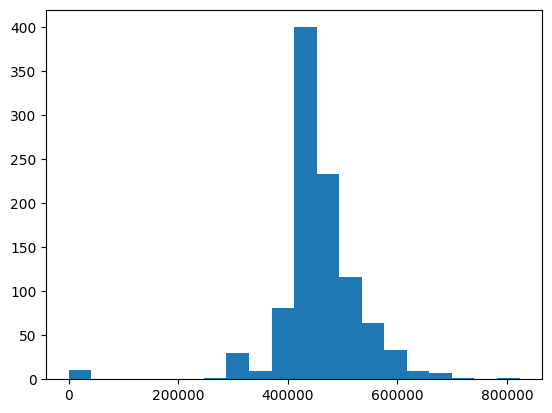

In [10]:
# examine distribution of assessed value for outliers
plt.hist(greenfield_df["assessed_value"], bins=20);

In [11]:
# check if 200,000 is a good cutoff point for outliers
greenfield_df[greenfield_df["assessed_value"] < 200000]

,account_number,house_number,street_name,garage,neighbourhood_id,neighbourhood,ward,assessed_value,latitude,longitude,point_location,tax_class_pct_1,mill_class_1
201,7898430,11461,39 AVENUE NW,N,5220,GREENFIELD,papastew Ward,4500,53.474907,-113.531088,"{'type': 'Point', 'coordinates': [-113.5310880...",100,RESIDENTIAL
322,7895477,11403,38 AVENUE NW,Y,5220,GREENFIELD,papastew Ward,0,53.473767,-113.527544,"{'type': 'Point', 'coordinates': [-113.5275442...",100,RESIDENTIAL
339,7891187,11750,37 AVENUE NW,N,5220,GREENFIELD,papastew Ward,8000,53.471462,-113.535582,"{'type': 'Point', 'coordinates': [-113.5355820...",100,RESIDENTIAL
459,7904105,11120,35A AVENUE NW,N,5220,GREENFIELD,papastew Ward,8500,53.469266,-113.518438,"{'type': 'Point', 'coordinates': [-113.5184378...",100,RESIDENTIAL
512,7904238,3612,111A STREET NW,N,5220,GREENFIELD,papastew Ward,8000,53.470342,-113.518118,"{'type': 'Point', 'coordinates': [-113.5181183...",100,RESIDENTIAL
535,7904469,11209,37 AVENUE NW,N,5220,GREENFIELD,papastew Ward,8000,53.471413,-113.521489,"{'type': 'Point', 'coordinates': [-113.5214893...",100,RESIDENTIAL
679,7903966,3609,111B STREET NW,N,5220,GREENFIELD,papastew Ward,8000,53.470341,-113.518761,"{'type': 'Point', 'coordinates': [-113.5187609...",100,RESIDENTIAL
723,7906019,11210,37 AVENUE NW,N,5220,GREENFIELD,papastew Ward,8000,53.471909,-113.521679,"{'type': 'Point', 'coordinates': [-113.5216793...",100,RESIDENTIAL
737,7902968,11200,36A AVENUE NW,N,5220,GREENFIELD,papastew Ward,8500,53.470831,-113.522874,"{'type': 'Point', 'coordinates': [-113.5228742...",100,RESIDENTIAL
781,7892821,11411,35A AVENUE NW,N,5220,GREENFIELD,papastew Ward,8000,53.468756,-113.529389,"{'type': 'Point', 'coordinates': [-113.5293891...",100,RESIDENTIAL


In [12]:
# these are likely all powerline properties, so can be dropped
greenfield_df = greenfield_df[greenfield_df["assessed_value"]>200000]

In [13]:
greenfield_df.describe()

,account_number,house_number,neighbourhood_id,assessed_value,latitude,longitude,tax_class_pct_1
count,9.860000e+02,986.000000,986.0,986.000000,986.000000,986.000000,986.0
mean,7.807261e+06,8474.603448,5220.0,461751.521298,53.471374,-113.527914,100.0
std,7.052808e+05,3789.067796,0.0,62678.651250,0.002558,0.006543,0.0
min,1.089432e+06,3403.000000,5220.0,285500.000000,53.466372,-113.538150,100.0
25%,7.891611e+06,3708.750000,5220.0,427500.000000,53.469266,-113.533829,100.0
50%,7.896979e+06,11161.000000,5220.0,449500.000000,53.471181,-113.529032,100.0
75%,7.904047e+06,11511.750000,5220.0,489375.000000,53.473557,-113.521562,100.0
max,7.909658e+06,11784.000000,5220.0,823000.000000,53.476050,-113.517133,100.0


# Plot

In [17]:
fig = px.scatter_mapbox(greenfield_df, 
                        lat="latitude", 
                        lon="longitude", 
                        hover_name="assessed_value", 
                        hover_data=["house_number", "assessed_value"],
                        color = "assessed_value",
                        zoom=14, 
                        height=800,
                        width=800)

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()